In [21]:
#Experiment: wheat grown under different vernalization treatments in greenhouse
#Goal 1: tidy data
#Goal 2: create a violin plot of greenhouse trial heading dates (Zadoks stage 59)
#Goal 2: create a boxplot of field heading dates

In [22]:
#load library
library(tibble)
library(ggplot2)
#datasets were stored in separate files per vernalization treatment
#import dataset "2014-2week.csv"
wk2trt2014 <- read.table("C:/Users/Daniela/Documents/GBS-data/MD233xSS8641_Oct2018/all-markers-R/lsmeans/GHdata/2014-2week.csv",header=TRUE,sep=",",na.strings=".")
head(wk2trt2014)

rep,geno,st59
1,1,126
2,1,153
3,1,117
4,1,119
5,1,125
6,1,115


In [23]:
#variables were stored in file name, need to be in columns: vernalization treatment, year
#tidy data: "Each variable must have its own column."

#convert to tibble, add new columns for variables stored in file name
tib2wk2014 <- as_tibble(wk2trt2014)
tib2wk2014 <- add_column(tib2wk2014, treatment="2 week", year="2014")
head(tib2wk2014)

rep,geno,st59,treatment,year
1,1,126,2 week,2014
2,1,153,2 week,2014
3,1,117,2 week,2014
4,1,119,2 week,2014
5,1,125,2 week,2014
6,1,115,2 week,2014


In [24]:
#repeat import and tidying for all other datasets
wk4trt2014 <- read.table("C:/Users/Daniela/Documents/GBS-data/MD233xSS8641_Oct2018/all-markers-R/lsmeans/GHdata/2014-4week.csv",header=TRUE,sep=",")
tib4wk2014 <- as_tibble(wk4trt2014)
tib4wk2014 <- add_column(tib4wk2014, treatment="4 week", year="2014")
wk6trt2014 <- read.table("C:/Users/Daniela/Documents/GBS-data/MD233xSS8641_Oct2018/all-markers-R/lsmeans/GHdata/2014-6week.csv",header=TRUE,sep=",")
tib6wk2014 <- as_tibble(wk6trt2014)
tib6wk2014 <- add_column(tib6wk2014, treatment="6 week", year="2014")
wk8trt2014 <- read.table("C:/Users/Daniela/Documents/GBS-data/MD233xSS8641_Oct2018/all-markers-R/lsmeans/GHdata/2014-8week.csv",header=TRUE,sep=",")
tib8wk2014 <- as_tibble(wk8trt2014)
tib8wk2014 <- add_column(tib8wk2014, treatment="8 week", year="2014")
wk2trt2015 <- read.table("C:/Users/Daniela/Documents/GBS-data/MD233xSS8641_Oct2018/all-markers-R/lsmeans/GHdata/2015-2week.csv",header=TRUE,sep=",")
tib2wk2015 <- as_tibble(wk2trt2015)
tib2wk2015 <- add_column(tib2wk2015, treatment="2 week", year="2015")
wk4trt2015 <- read.table("C:/Users/Daniela/Documents/GBS-data/MD233xSS8641_Oct2018/all-markers-R/lsmeans/GHdata/2015-4week.csv",header=TRUE,sep=",")
tib4wk2015 <- as_tibble(wk4trt2015)
tib4wk2015 <- add_column(tib4wk2015, treatment="4 week", year="2015")
wk8trt2015 <- read.table("C:/Users/Daniela/Documents/GBS-data/MD233xSS8641_Oct2018/all-markers-R/lsmeans/GHdata/2015-8week.csv",header=TRUE,sep=",")
tib8wk2015 <- as_tibble(wk8trt2015)
tib8wk2015 <- add_column(tib8wk2015, treatment="8 week", year="2015")

In [25]:
#edit column names of tib8wk2014 to match other datasets
colnames(tib8wk2014) <- c("rep","geno","st59", "treatment","year")
head(tib8wk2014)

rep,geno,st59,treatment,year
1,1,39,8 week,2014
2,1,39,8 week,2014
3,1,34,8 week,2014
4,1,38,8 week,2014
5,1,39,8 week,2014
6,1,42,8 week,2014


In [26]:
#append all datasets together in one
allgh <- rbind(tib2wk2014, tib4wk2014, tib6wk2014, tib8wk2014, tib2wk2015, tib4wk2015, tib8wk2015)
head(allgh)
tail(allgh)
#check class of columns in new dataset
sapply(allgh, class)

rep,geno,st59,treatment,year
1,1,126,2 week,2014
2,1,153,2 week,2014
3,1,117,2 week,2014
4,1,119,2 week,2014
5,1,125,2 week,2014
6,1,115,2 week,2014


rep,geno,st59,treatment,year
1,8641,54,8 week,2015
2,8641,55,8 week,2015
3,8641,54,8 week,2015
4,8641,58,8 week,2015
5,8641,55,8 week,2015
6,8641,55,8 week,2015


rep        geno        st59   treatment        year 
  "integer"   "integer" "character" "character" "character"

In [27]:
#update column classes
allgh$treatment = as.factor(allgh$treatment)
allgh$st59 = as.numeric(allgh$st59)
allgh$year = as.factor(allgh$year)
sapply(allgh, class)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

rep      geno      st59 treatment      year 
"integer" "integer" "numeric"  "factor"  "factor"

In [28]:
#create new dataset with DH lines only, no parental lines
allghnp <- subset(allgh, !geno%in%c("233", "8641"))
tail(allghnp)
sapply(allghnp, class)

rep,geno,st59,treatment,year
1,131,62,8 week,2015
2,131,59,8 week,2015
3,131,64,8 week,2015
4,131,68,8 week,2015
5,131,62,8 week,2015
6,131,62,8 week,2015


rep      geno      st59 treatment      year 
"integer" "integer" "numeric"  "factor"  "factor"

Warning message:
"Removed 111 rows containing non-finite values (stat_ydensity)."

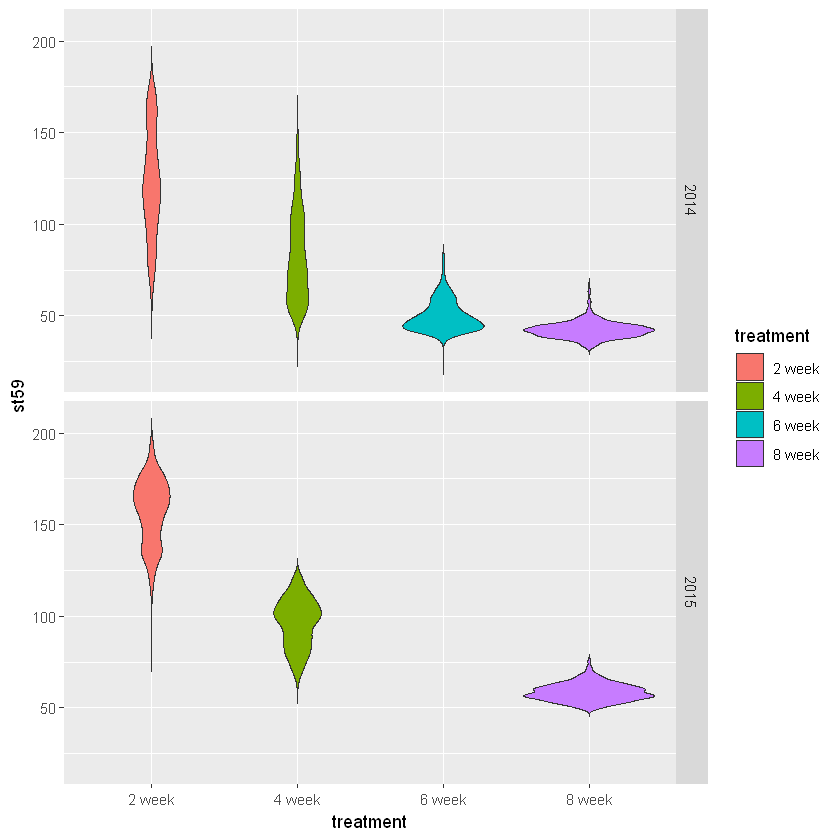

In [53]:
#create baseplot and basic violin plot, facet by year
bp <- ggplot(allghnp, aes(x=treatment, y=st59, fill=treatment))
vp <- bp +geom_violin(trim=FALSE) + facet_grid(allghnp$year)
vp

Warning message:
"Removed 111 rows containing non-finite values (stat_ydensity)."

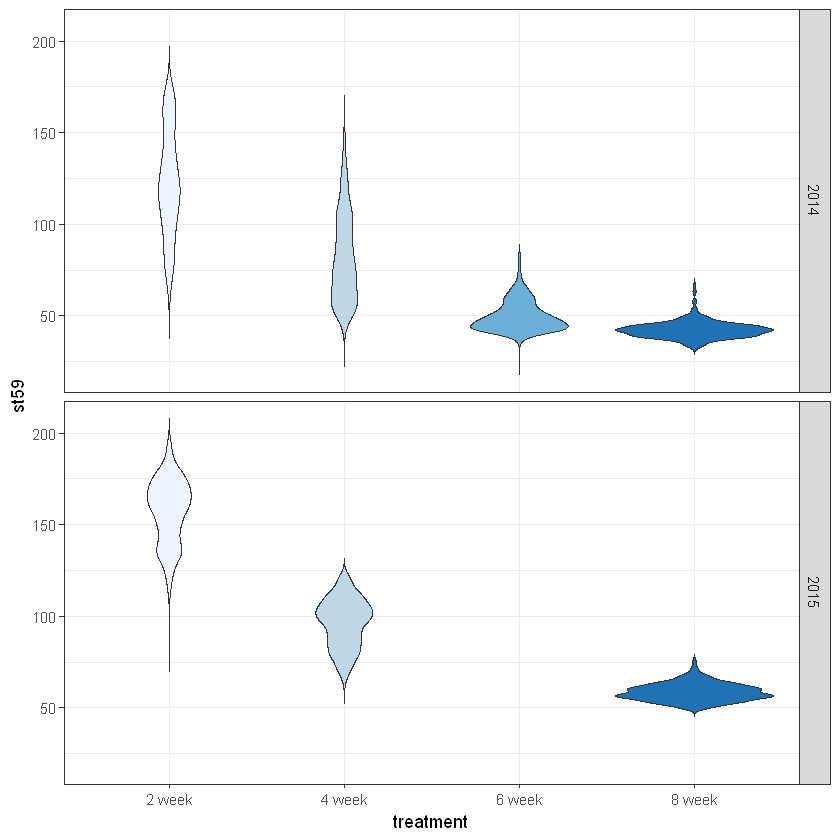

In [54]:
#adjust colors and theme, remove legend
svp <- vp + scale_fill_brewer() + theme_bw() + guides(fill=FALSE)
svp

Warning message:
"Removed 111 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 111 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 111 rows containing non-finite values (stat_summary)."

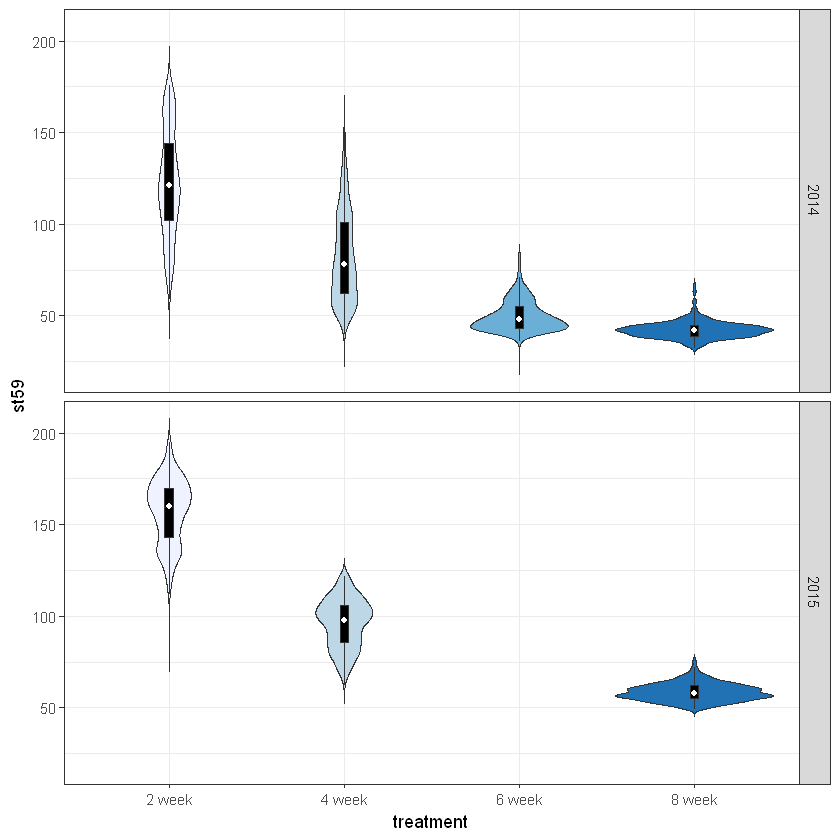

In [31]:
#add boxplot overlay to violin plot
bsvp <- svp + geom_boxplot(width=.05, fill="black", outlier.colour=NA) + stat_summary(fun.y=median, geom="point", fill="white", shape=21, size=2.0)
bsvp

Warning message:
"Removed 111 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 111 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 111 rows containing non-finite values (stat_summary)."

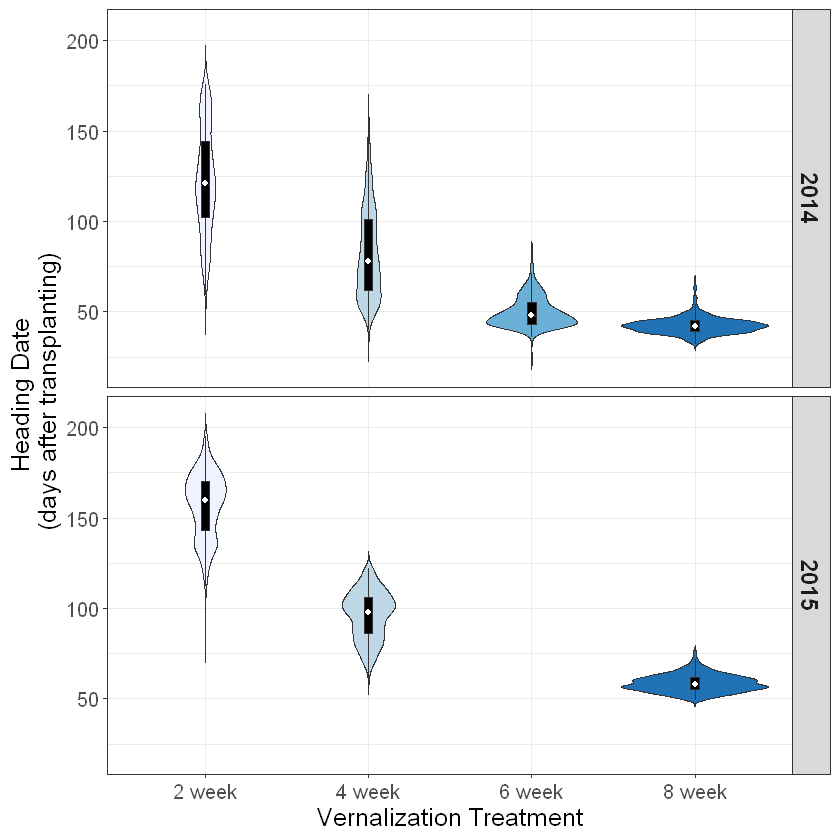

In [55]:
#create final plot: add axis names and adjust label sizes
lbsvp <- bsvp + theme_bw()+ xlab("Vernalization Treatment") + ylab("Heading Date \n(days after transplanting)") + theme(strip.text = element_text(face="bold", size=rel(1.25))) + theme(axis.text = element_text(size=rel(1.1))) + theme(axis.title.x=element_text(size=15)) + theme(axis.title.y=element_text(size=15))
lbsvp

In [56]:
#save violin plot
ggsave("HD-GH-alltrt-violinplot.png")

Saving 6.67 x 6.67 in image
Warning message:
"Removed 111 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 111 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 111 rows containing non-finite values (stat_summary)."

In [57]:
#Goal 2: create boxplot of heading date for field data

In [58]:
#import field dataset (all variables in one table already)
hdfield <- read.table("C:/Users/Daniela/Documents/GBS-data/MD233xSS8641_Oct2018/all-markers-R/QTL-maps/MS-DH-field-HD-comp.csv",header=TRUE,sep=",",na.strings=".")
hdfield <- as_tibble(hdfield)
head(hdfield)
tail(hdfield)
class(hdfield)

env,rep,geno,HD
1,1,1,123
1,1,3,128
1,1,4,125
1,1,5,128
1,1,6,122
1,1,7,129


env,rep,geno,HD
8,2,125,115
8,2,126,118
8,2,128,119
8,2,129,115
8,2,130,116
8,2,131,121


[1] "tbl_df"     "tbl"        "data.frame"

In [59]:
#environments listed as numbers, want location & year
#edit env values as.character
hdfield$env <- as.character(hdfield$env)
hdfield$env[hdfield$env == "1"] <- "2011 Salisbury"
hdfield$env[hdfield$env == "2"] <- "2012 Salisbury"
hdfield$env[hdfield$env == "3"] <- "2012 Nuevo de Julio"
hdfield$env[hdfield$env == "4"] <- "2013 Clarksville"
hdfield$env[hdfield$env == "5"] <- "2014 Clarksville"
hdfield$env[hdfield$env == "6"] <- "2013 Queenstown"
hdfield$env[hdfield$env == "7"] <- "2014 Queenstown"
hdfield$env[hdfield$env == "8"] <- "2014 Kinston"
head(hdfield)
tail(hdfield)

env,rep,geno,HD
2011 Salisbury,1,1,123
2011 Salisbury,1,3,128
2011 Salisbury,1,4,125
2011 Salisbury,1,5,128
2011 Salisbury,1,6,122
2011 Salisbury,1,7,129


env,rep,geno,HD
2014 Kinston,2,125,115
2014 Kinston,2,126,118
2014 Kinston,2,128,119
2014 Kinston,2,129,115
2014 Kinston,2,130,116
2014 Kinston,2,131,121


In [60]:
#check column classes
sapply(hdfield, class)

env         rep        geno          HD 
"character"   "integer"   "integer"   "integer"

In [61]:
#set column classes
hdfield$env = as.factor(hdfield$env)
hdfield$HD = as.numeric(hdfield$HD)
sapply(hdfield, class)
class(hdfield)

env       rep      geno        HD 
 "factor" "integer" "integer" "numeric"

[1] "tbl_df"     "tbl"        "data.frame"

Warning message:
"Removed 18 rows containing non-finite values (stat_boxplot)."

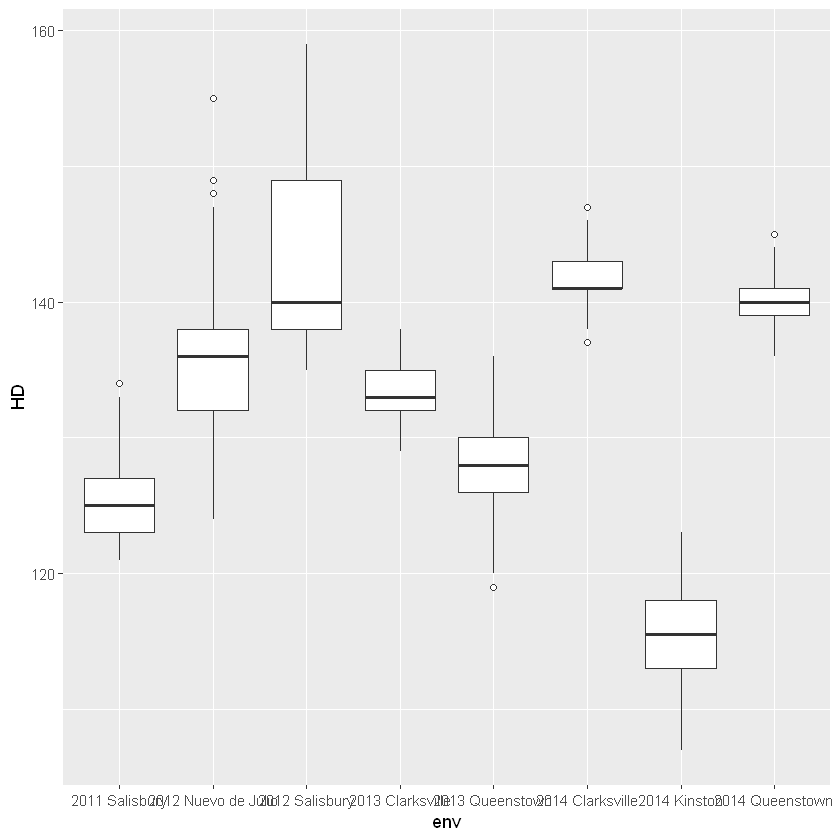

In [62]:
#create baseplot and boxplot
bpf <- ggplot(hdfield, aes(x=env, y=HD))
bxpf <- bpf + geom_boxplot(outlier.size=1.5, outlier.shape=21)
bxpf

Warning message:
"Removed 35 rows containing non-finite values (stat_boxplot)."

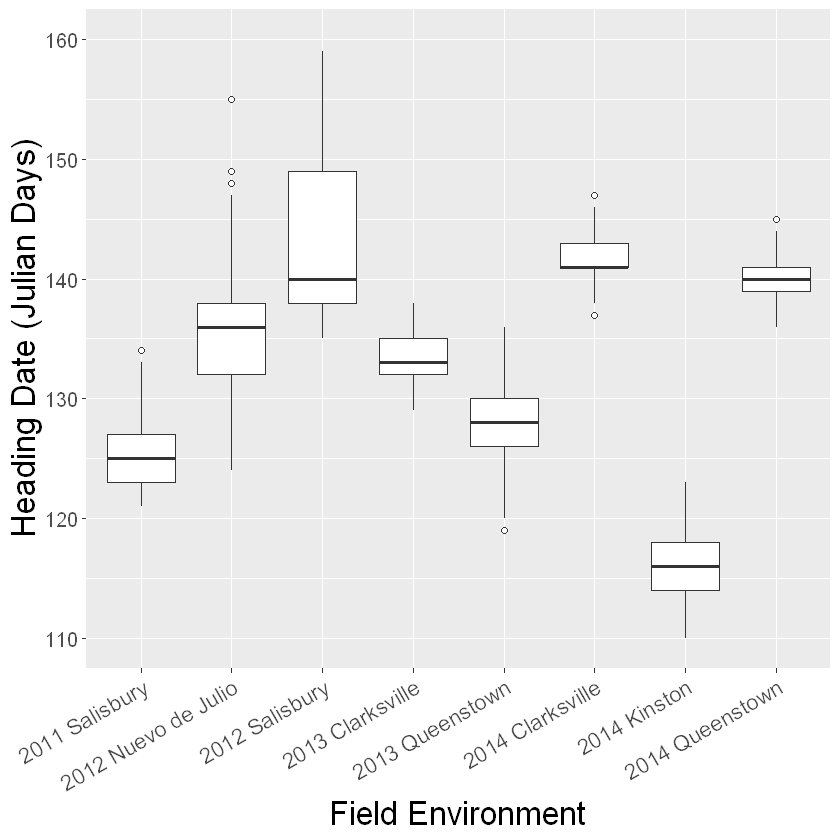

In [63]:
#create final plot: add axis labels, edit theme elements
lbxpf <- bxpf + xlab("Field Environment") +ylab("Heading Date (Julian Days)") + theme(axis.text.x = element_text(angle=30, hjust=1, size=rel(1.1))) + ylim(110, 160) + theme(axis.text = element_text(size=rel(1.1))) +theme(axis.title.x=element_text(size=20)) + theme(axis.title.y=element_text(size=20))
lbxpf

In [64]:
#save boxplot
ggsave("HD-all-field-boxplot.png")

Saving 6.67 x 6.67 in image
Warning message:
"Removed 35 rows containing non-finite values (stat_boxplot)."